In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pdb
import os

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# *1. Getting used to the data*

In [2]:
df = pd.read_csv('inpatientCharges.csv')
df.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71


In [3]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
 Total Discharges                       163065 non-null int64
 Average Covered Charges                163065 non-null object
 Average Total Payments                 163065 non-null object
Average Medicare Payments               163065 non-null object
dtypes: int64(3), object(9)
memory usage: 14.9+ MB


In [5]:
df['DRG Definition'].unique().shape
df['Provider Id'].unique().shape
df['Provider City'].unique().shape

(1977,)

In [6]:
df.columns = [column.strip() for column in df.columns]

In [7]:
for column in ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']:
    df[column] = df[column].map(lambda x: x[1:])
    df[column] = pd.to_numeric(df[column])

In [8]:
agg_columns = ['mean', 'median', 'var', 'std', 'count', 'min', 'max']
groupby_drg = df[['DRG Definition', 'Average Total Payments']].groupby(by='DRG Definition').agg(agg_columns)
groupby_drg.columns = [header + '-' + agg_column 
                       for header, agg_column in zip(groupby_drg.columns.get_level_values(0), agg_columns)]
groupby_drg.columns = groupby_drg.columns.get_level_values(0)

In [9]:
groupby_drg.reset_index(inplace=True)
groupby_drg['Average Total Payments-range'] = groupby_drg['Average Total Payments-max'] - groupby_drg['Average Total Payments-min']
groupby_drg.head()

,DRG Definition,Average Total Payments-mean,Average Total Payments-median,Average Total Payments-var,Average Total Payments-std,Average Total Payments-count,Average Total Payments-min,Average Total Payments-max,Average Total Payments-range
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004,6582.890,2.184111e+06,1477.873952,1079,4968.00,18420.56,13452.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,6706.276445,6093.750,4.137017e+06,2033.965862,1201,4194.09,25519.43,21325.34
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,13263.823032,12084.700,1.480647e+07,3847.918207,1659,8174.28,50882.40,42708.12
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,7922.671141,7280.050,4.345800e+06,2084.658336,2269,5368.73,26510.15,21141.42
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5713.985221,5326.025,1.802410e+06,1342.538675,1806,3916.41,14744.05,10827.64


In [10]:
def plt_setup(_plt):
    _plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

# *2. Some observations regarding costs of each DRG Definition*

## *A few treatments (DRG Definitions) are noticeably more costly than others*

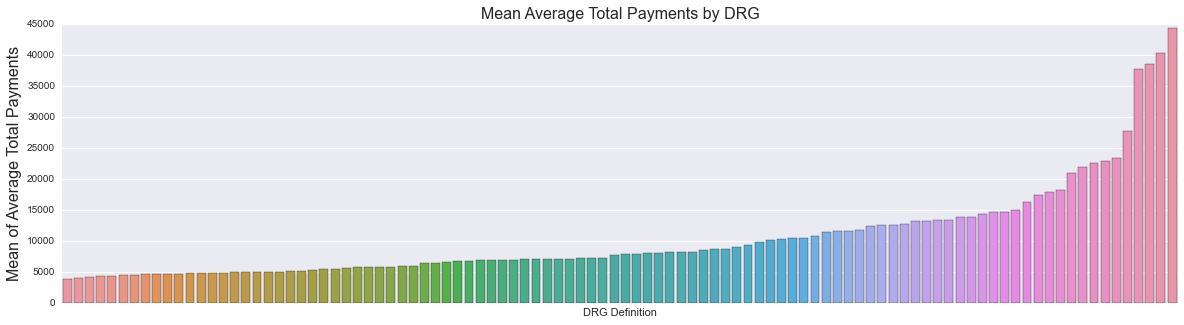

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Total Payments-mean', 
            data=groupby_drg.sort_values('Average Total Payments-mean'))
plt_setup(plt)
plt.title('Mean Average Total Payments by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments', fontsize=16)

## *Most expensive DRGs also have the highest variance in costs*
***Sorted by the same order as the first plot (by average total payments)***

***What does this mean? There are cheaper options for the most expensive DRG Definitions***

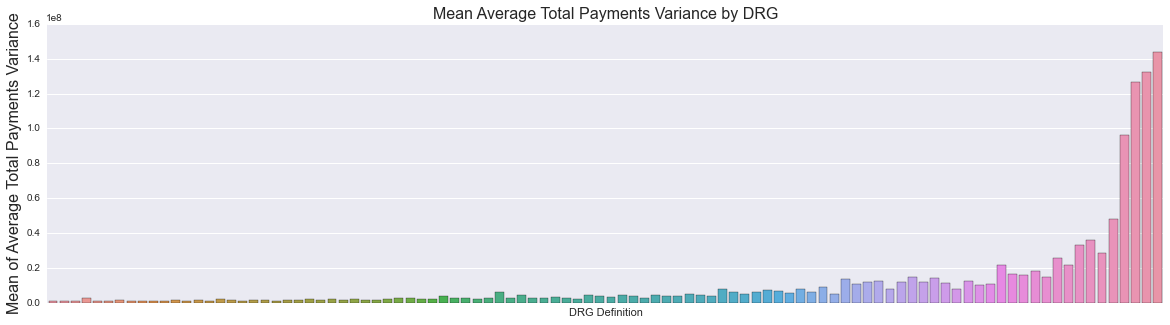

In [12]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Total Payments-var', 
            data=groupby_drg.sort_values('Average Total Payments-mean'))
plt_setup(plt)
plt.title('Mean Average Total Payments Variance by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments Variance', fontsize=16)

## *Most expensive DRGs have less in-patients (fortunately)*

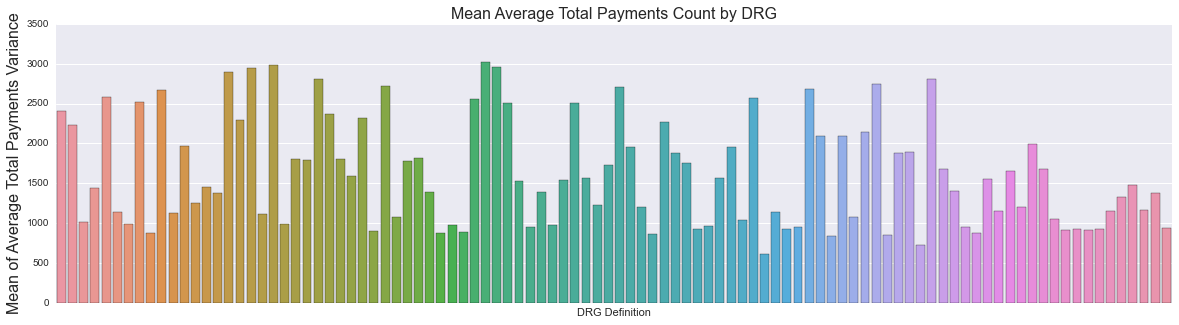

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Total Payments-count', 
            data=groupby_drg.sort_values('Average Total Payments-var'))
plt_setup(plt)
plt.title('Mean Average Total Payments Count by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments Variance', fontsize=16)

## *Most expensive DRG also have the highest range in costs*
*** Simply confirms the conclusions above ***

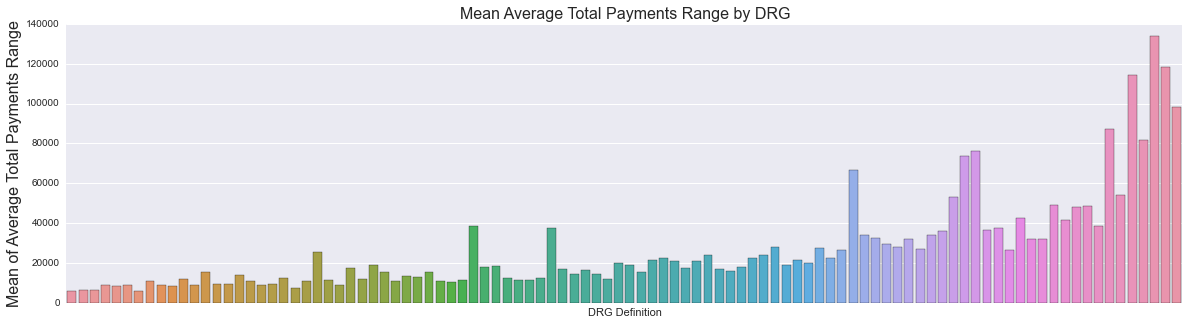

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Total Payments-range', 
            data=groupby_drg.sort_values('Average Total Payments-var'))
plt_setup(plt)
plt.title('Mean Average Total Payments Range by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments Range', fontsize=16)

# *3. Which states are the most expensive for each treatment?*

In [15]:
import csv, sqlite3
os.listdir('.')

['.DS_Store',
 '.ipynb_checkpoints',
 'explore.ipynb',
 'hospital_charges.db',
 'inpatientCharges.csv']

In [16]:
def unlock_db(db_filename):
    """Replace db_filename with the name of the SQLite database."""
    connection = sqlite3.connect(db_filename)
    connection.commit()
    connection.close()
    
unlock_db('hospital_charges.db')

In [17]:
conn = sqlite3.connect('hospital_charges.db')
_df = pd.read_csv('inpatientCharges.csv')
_df.columns = [column.strip() for column in _df.columns]
for column in ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']:
    _df[column] = _df[column].map(lambda x: x[1:])
    _df[column] = pd.to_numeric(_df[column])
_df.to_sql('hospital_charges', conn, if_exists='replace', index=False)
conn.close()

In [18]:
conn = sqlite3.connect('hospital_charges.db')

query = '''
SELECT `DRG Definition`, `Provider State` as providerState, t.maxAvgPaymentPerDRG
FROM hospital_charges hc
INNER JOIN (
    SELECT `DRG Definition` as drg, MAX(`Average Total Payments`) as maxAvgPaymentPerDRG
    FROM hospital_charges
    GROUP BY `DRG Definition`
) t
ON hc.`DRG Definition` == t.drg AND hc.`Average Total Payments` == t.maxAvgPaymentPerDRG
ORDER BY providerState ASC
'''

cursor = conn.execute(query)
results = [record for record in cursor]
conn.close()

In [19]:
_df = pd.DataFrame(results, columns=['DRG', 'ProviderState', 'Payment'])

In [20]:
conn = sqlite3.connect('hospital_charges.db')

ranking_by_drg = dict()
for drg in df['DRG Definition'].unique():

    query = """
        SELECT `Provider State` as providerState
        FROM hospital_charges
        WHERE `DRG Definition` = '{drg}' 
        GROUP BY `Provider State`
        ORDER BY AVG(`Average Total Payments`) ASC
    """.format(drg=drg)
    
    cursor = conn.execute(query)
    ranking_by_drg[drg] = [record[0] for record in cursor]
    
conn.close()

In [21]:
for k,v in ranking_by_drg.iteritems():
    while True:
        if len(v) >= 51:
            break
        v.append(None)

In [22]:
drg_by_id = {key.split(' - ')[0]: key for key in ranking_by_drg.keys()}
df_rank = pd.DataFrame(ranking_by_drg)

In [23]:
from collections import defaultdict

_df = pd.DataFrame(index=df['Provider State'].unique())
for column in df_rank.columns:
    rankings_by_state = []

    if column in ['rank']:
        continue
        
    for rank, curr_state in zip(df.index, df_rank[column]):
        rankings_by_state.append(curr_state)
    
    t = pd.DataFrame(rankings_by_state, columns=['State'])
    t['Rank'] = t.index
    t.set_index(['State'], inplace=True)
    
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
    
_df.columns = drg_by_id.keys()

In [24]:
_df.fillna(-100, inplace=True)
_df.head() #wherre -100 is not a rank but only a placeholder - shown as dark blue in the heatmap

,491,690,698,699,281,280,812,282,287,286,...,482,481,480,948,473,470,689,684,683,682
AK,45,46,50,50,50,49.0,-100.0,49,-100.0,49,...,50,49,47.0,50,50,48.0,48,-100.0,49,50
AL,0,0,1,1,0,0.0,2.0,0,2.0,0,...,0,1,1.0,1,1,1.0,0,2.0,1,0
AR,3,4,3,2,2,1.0,5.0,3,1.0,1,...,3,0,0.0,0,2,2.0,1,6.0,0,1
AZ,36,29,33,33,34,36.0,22.0,34,27.0,35,...,36,25,25.0,38,37,34.0,8,23.0,27,28
CA,44,44,47,45,46,44.0,44.0,44,40.0,45,...,46,46,45.0,45,45,44.0,46,44.0,44,44


## ***Cost Ranking by State for each DRP***

***Dark shade = More expensive***

***E.g. CA, DC and NY consistently rank as one of the most expensive cities for all treatments***

## ***Heatmap clearly shows which state is cheap/expensive for different treatments***

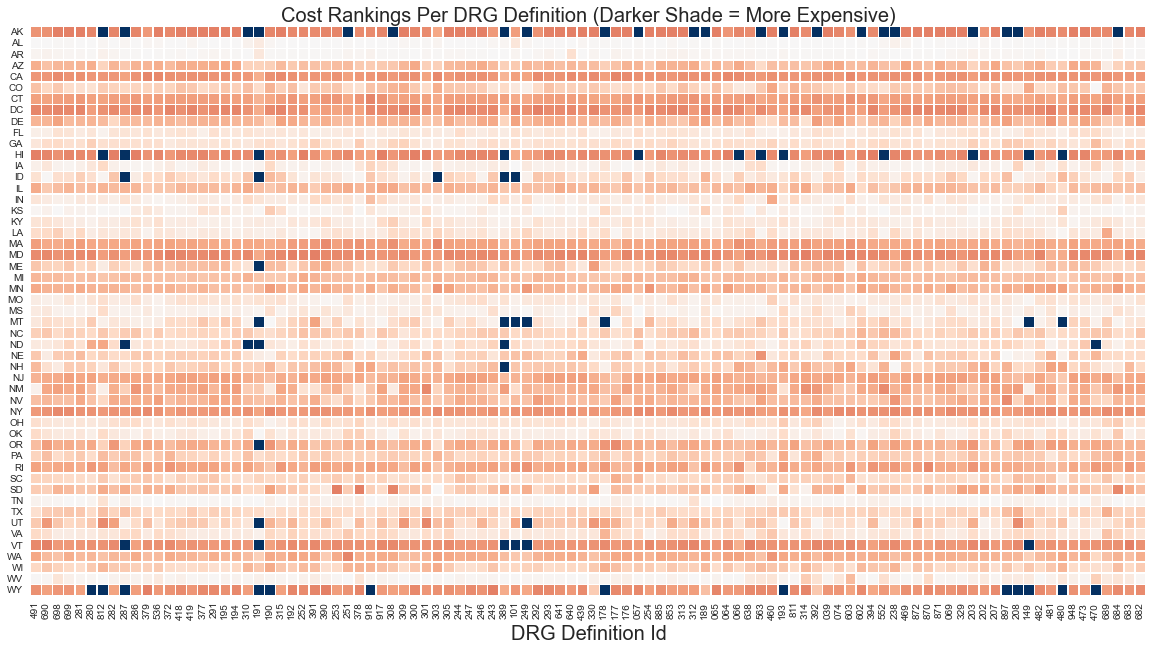

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(_df, square=True, vmin=-100, cbar=False, linewidths=0.1)
plt.title("Cost Rankings Per DRG Definition (Darker Shade = More Expensive)", fontsize=20)
plt.xlabel("DRG Definition Id", fontsize=20)

# ***4. What is the distribution of each DRG Definition for each state?***

In [26]:
conn = sqlite3.connect('hospital_charges.db')

total_discharges_by_drg = dict()
for drg in df['DRG Definition'].unique():

    query = """
        SELECT `Provider State` as providerState, SUM(`Total Discharges`) as numDischarges
        FROM hospital_charges
        WHERE `DRG Definition` = '{drg}' 
        GROUP BY `Provider State`
    """.format(drg=drg)
    
    cursor = conn.execute(query)
    total_discharges_by_drg[drg] = [(record[0], record[1]) for record in cursor]
    
conn.close()

In [27]:
_df = pd.DataFrame(index=df['Provider State'].unique())
for k,v in total_discharges_by_drg.iteritems():
    t = pd.DataFrame(v, columns=['State', 'Total_Discharges'])
    t.set_index(['State'], inplace=True)
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
_df.columns = drg_by_id.keys()
_df.fillna(0, inplace=True)

In [28]:
normalized_df = _df.divide(_df.sum(axis=1), axis=0)
normalized_df.head()

,491,690,698,699,281,280,812,282,287,286,...,482,481,480,948,473,470,689,684,683,682
AL,0.003209,0.003294,0.006727,0.008514,0.032557,0.019796,0.001864,0.006251,0.001591,0.024849,...,0.015297,0.002011,0.032221,0.005599,0.005410,0.002656,0.002095,0.019495,0.016748,0.002978
AK,0.000000,0.004559,0.006350,0.001954,0.035331,0.025399,0.001791,0.003256,0.000000,0.017747,...,0.021329,0.000000,0.030609,0.001791,0.003093,0.010257,0.000000,0.017909,0.009118,0.003582
AZ,0.004617,0.002486,0.006969,0.007285,0.025267,0.021959,0.001931,0.008786,0.002141,0.020305,...,0.019368,0.002849,0.026949,0.005028,0.006740,0.006023,0.002313,0.017934,0.018842,0.001663
AR,0.003527,0.003792,0.004725,0.007929,0.031682,0.016457,0.001832,0.007168,0.001360,0.023741,...,0.026991,0.002754,0.032120,0.004725,0.003573,0.003941,0.002247,0.018394,0.011894,0.005221
CA,0.001855,0.004430,0.005941,0.009864,0.029094,0.020801,0.006436,0.009150,0.002535,0.022100,...,0.013971,0.002213,0.029793,0.004394,0.006632,0.004171,0.001792,0.018955,0.016066,0.003246


## ***Commonality of treatments are generally consistent across states***

### ***Some states have higher proportion for specific DRG Definition (observed by inconsistent shade through column)*** 

### ***Healthcare providers/insurers may want to dive deeper into the cause***

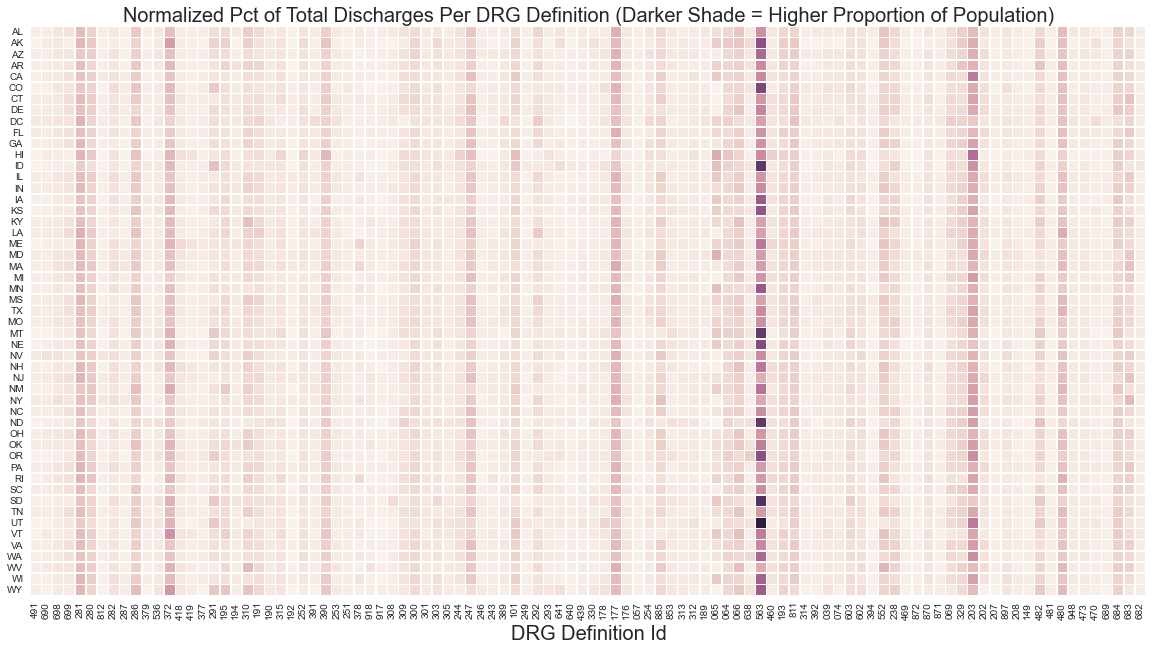

In [29]:
normalized_df = _df.divide(_df.sum(axis=1), axis=0)

plt.figure(figsize=(20,20))
sns.heatmap(normalized_df, square=True, vmin=0, cbar=False, linewidths=0.1)
plt.title("Normalized Pct of Total Discharges Per DRG Definition (Darker Shade = Higher Proportion of Population)", fontsize=20)
plt.xlabel("DRG Definition Id", fontsize=20)

## ***A few of the most common conditions:***
### ***FX, SPRN, STRN & DISL, BRONCHITIS, RESPIRATORY INFECTIONS***

In [30]:
drg_by_id['563'], drg_by_id['203'], drg_by_id['177']

('563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP, PELVIS & THIGH W/O MCC',
 '203 - BRONCHITIS & ASTHMA W/O CC/MCC',
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC')

#  ***5. Dive Deeper into a specific DRG Definition***

## ***Select DRG Definition 203 (Bronchitis & Asthma w/o cc/mcc)***

In [31]:
SELECTED_DRG =  drg_by_id['203']
SELECTED_PROVIDER_ID = None
SELECTED_DRG

'203 - BRONCHITIS & ASTHMA W/O CC/MCC'

In [32]:
_df = df[df['DRG Definition'] == SELECTED_DRG]
_df.loc[:, 'Provider State'] = _df.loc[:, 'Provider State'].astype('category')
groupby_state = _df.groupby(by='Provider State').agg(['mean', 'min', 'max'])
groupby_state.reset_index(inplace=True)

In [33]:
groupby_state.head(3)

Provider State   Provider Id               Provider Zip Code                \
                          mean    min    max              mean    min    max   
0             AL  10065.500000  10006  10164      35982.735294  35058  36854   
1             AR  40056.750000  40007  40119      72244.833333  71603  72764   
2             AZ  30057.142857  30002  30119      85538.357143  85006  86409   

  Total Discharges         Average Covered Charges                     \
              mean min max                    mean      min       max   
0        17.205882  11  38            12310.583235  3113.76  42618.56   
1        15.250000  11  22            11199.528333  6122.88  16480.90   
2        15.000000  11  23            16741.854286  7385.11  30118.72   

  Average Total Payments                   Average Medicare Payments           \
                    mean      min      max                      mean      min   
0            3818.779706  2951.11  6254.63               2370.805882  1148.90   
1            3845.863333  3237.47  4685.30               2606.123333  2153.85   
2            4194.589286  3602.54  5179.29               3041.233571  2283.90   

            
       max  
0  3823.71  
1  3433.22  
2  4248.94

## ***Based on the 95% confidence interval (the gray bar), costs appears to be within a tight range across each state with the exception of MA and DC***

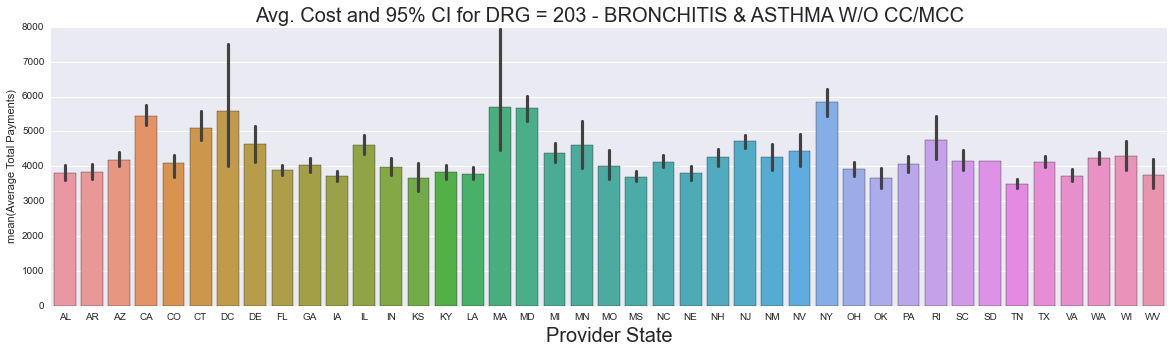

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x='Provider State', y='Average Total Payments', data=_df)
plt.title('Avg. Cost and 95% CI for DRG = {}'.format(SELECTED_DRG), fontsize=20)
plt.xlabel('Average Cost ($)', fontsize=20)
plt.xlabel('Provider State', fontsize=20)

## ***One of the data points in State MA is extremely high - Anomaly/Fraud?*** 

## ***Otherwise, cost appears to be consistent across states. Even expensive states (CA, NY) have low-cost options.***

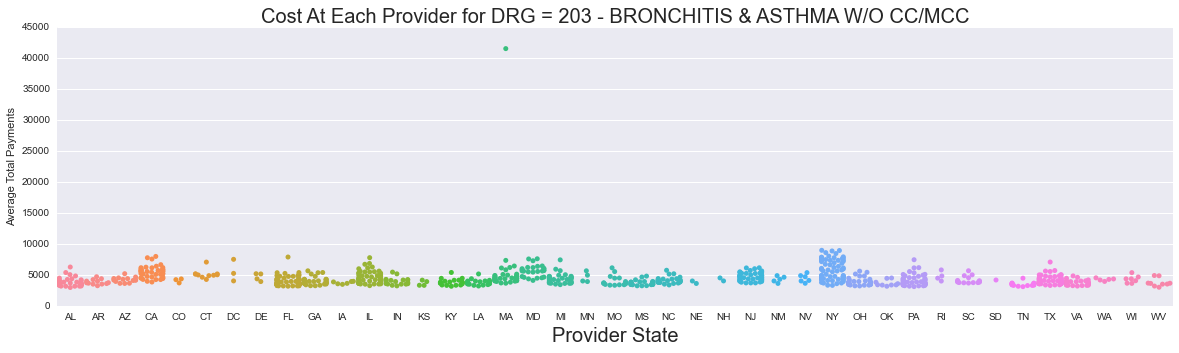

In [35]:
plt.figure(figsize=(20,5))
sns.swarmplot(x="Provider State", y='Average Total Payments', data=_df)
plt.title('Cost At Each Provider for DRG = {}'.format(SELECTED_DRG), fontsize=20)
plt.xlabel('Cost ($)', fontsize=20)
plt.xlabel('Provider State', fontsize=20)

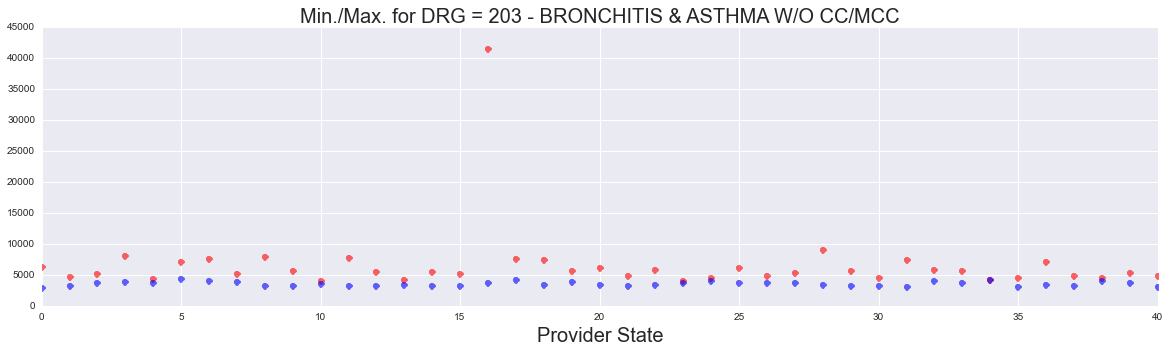

In [36]:
plt.figure(figsize=(20,5))
plt.plot(range(len(groupby_state['Provider State'])), 
         groupby_state['Average Total Payments']['max'], 'r.', markersize=14, alpha=0.6)
plt.plot(range(len(groupby_state['Provider State'])), 
         groupby_state['Average Total Payments']['min'], 'b.', markersize=14, alpha=0.6)
plt.title('Min./Max. for DRG = {}'.format(SELECTED_DRG), fontsize=20)
plt.xlabel('Cost ($)', fontsize=20)
plt.xlabel('Provider State', fontsize=20)
plt.show()